# Table of contents
NOTE: Github Notebook preview is disabling some features like navigating to specific section

To be able to use this feture it is required to do one of below:
- Preview in **github.dev** enviroment [link to this repository on github.dev](https://github.dev/SalamanderKrajza/ds-compendium/blob/main/projects/ds_salaries.ipynb)
    - It requires to be logged in
    - IT REQUIRES TO INSTALL PYTHON EXTENSION to render charts correctly
- Go to **nbviewer**: [link to this repository on nbviewer](https://nbviewer.org/github/SalamanderKrajza/ds-compendium/blob/main/projects/ds_salaries.ipynb)
    - **MAY SHOW OUTDATED VERSION** - there is some problems with caching onbviewer, looks like it required 24h after commiting to refresh; 
    - later i may host my own version of nbviewer 
- Check **HTML version in htmlpreview**: [link to this project on htmlpreview.github.io](https://htmlpreview.github.io/?https://github.com/SalamanderKrajza/ds-compendium/blob/main/projects/ds_salaries.html)
- Clone repository and **preview its content locally**


### TOC:
01.  [Imports and configs](#Imports-and-configs)
02.  [Load data](#Load-data)
03.  [Data exploration](#Data-exploration)
     -  [General informations about content](#General-informations-about-content)
     -  [Check how many duplicated rows we have to determine if it may impact results](#Check-how-many-duplicated-rows-we-have-to-determine-if-it-may-impact-results)
     -  [Text type columns preview](#Text-type-columns-preview)
     -  [Numerical columns preview](#Numerical-columns-preview)
     -  [Analyze correlation and pairplots](#Analyze-correlation-and-pairplots)
04.  [Data transformations](#Data-transformations)
     -  [Import and define encoders](#Import-and-define-encoders)
     -  [Create pipeline](#Create-pipeline)
     -  [Fit pipeline and save pipeline](#Fit-pipeline-and-save-pipeline)
     -  [Preview and save transformed train data](#Preview-and-save-transformed-train-data)
05.  [Data exploration after transofmations](#Data-exploration-after-transofmations)
     -  [Check new features corelation with target](#Check-new-features-corelation-with-target)
     -  [Use PCA to visualize transformed data](#Use-PCA-to-visualize-transformed-data)
06.  [Prepare and transform test data for models](#Prepare-and-transform-test-data-for-models)
     -  [Transform, preview and save test data](#Transform,-preview-and-save-test-data)
07.  [Fit some models with default parameters](#Fit-some-models-with-default-parameters)
     -  [Import and define models](#Import-and-define-models)
     -  [Fit all imported models and print their errors](#Fit-all-imported-models-and-print-their-errors)
08.  [Analyze deeper some best of basic models](#Analyze-deeper-some-best-of-basic-models)
     -  [Analyze DecisionTreeRgressor (CHECK NOTE)](#Analyze-DecisionTreeRgressor-(CHECK-NOTE))
         -  [Select trained model and make predictions for test data with first model](#Select-trained-model-and-make-predictions-for-test-data-with-first-model)
         -  [Print targets, predictions and its differences on plots](#Print-targets,-predictions-and-its-differences-on-plots)
             -  [Basic version](#Basic-version)
             -  [Colored version](#Colored-version)
             -  [Check histogram of differences](#Check-histogram-of-differences)
     -  [Analyze different model](#Analyze-different-model)
         -  [Select trained model and make predictions for test data with different model](#Select-trained-model-and-make-predictions-for-test-data-with-different-model)
         -  [Print targets, predictions and its differences on plots for differrent model](#Print-targets,-predictions-and-its-differences-on-plots-for-differrent-model)
             -  [Filter out outliners to make plot readable](#Filter-out-outliners-to-make-plot-readable)
09.  [Find best hiperparameters for DecissionTreeRegressor](#Find-best-hiperparameters-for-DecissionTreeRegressor)
     -  [Plot basic hiperparameters to better understand data](#Plot-basic-hiperparameters-to-better-understand-data)
         -  [min_samples_split](#min_samples_split)
         -  [max_depth](#max_depth)
         -  [Determining if we have high bias/variance and what to do:](#Determining-if-we-have-high-bias/variance-and-what-to-do:)
     -  [Search for best parameters](#Search-for-best-parameters)
         -  [Test best hiperparameters](#Test-best-hiperparameters)
         -  [Compare 2 models trained with grid_search](#Compare-2-models-trained-with-grid_search)
10.  [Find best hiperparameters for SGDRegressor](#Find-best-hiperparameters-for-SGDRegressor)
     -  [Create and fit grid_search](#Create-and-fit-grid_search)
     -  [Train model with partial fit to plot train and validation errors](#Train-model-with-partial-fit-to-plot-train-and-validation-errors)
11.  [Save to html](#Save-to-html)

# Imports and configs

In [94]:
import pandas as pd
import numpy as np
import tensorflow as tf
from datetime import datetime
import seaborn as sns
sns.set_style("darkgrid")

# Load data

In [2]:
df = pd.read_csv(r'..\datasets\data\ds_salaries.csv', sep=",", index_col=0)
# https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?resource=download&select=ds_salaries.csv
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=1321)

# Data exploration

### General informations about content

In [4]:
df.info() #Most features would be categorical type; All of them had the same number of not-null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [5]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Check how many duplicated rows we have to determine if it may impact results

In [6]:
# Another idea maybe that we are predicting perfectly salaries for samples that hase exactly same parameters as another
print('duplicates: ', df[df.duplicated()].shape[0])
df[df.duplicated()].head()

duplicates:  42


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
256,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
331,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
332,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
333,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M


In [7]:
display(df.query('salary_in_usd == 90734'))

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
181,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L


I didn't filter out them as duplicates previously as because in **it is natural that some people in the same company may have exactly the same salary.** <br/>
It is natural and if we filter-out them it will decrease their impact on mean salaries what is not wanted by us! <br />

However, it will cause that decision tree will learn perfectly how to predict these values and it is natural

### Text type columns preview

In [8]:
text_columns = df_train.select_dtypes(include=['object'])
for column in text_columns:
    print(f"\n{df_train[column].value_counts()}")



SE    228
MI    173
EN     65
EX     19
Name: experience_level, dtype: int64

FT    471
PT      7
FL      4
CT      3
Name: employment_type, dtype: int64

Data Scientist                              109
Data Engineer                               104
Data Analyst                                 86
Machine Learning Engineer                    33
Research Scientist                           14
Data Architect                               10
Machine Learning Scientist                    7
Data Science Manager                          7
Big Data Engineer                             6
Principal Data Scientist                      6
Applied Data Scientist                        5
Computer Vision Engineer                      5
Data Engineering Manager                      5
Data Analytics Manager                        5
Lead Data Engineer                            5
BI Data Analyst                               5
Data Science Consultant                       5
Head of Data                

In [9]:
text_columns_few_categories = ['experience_level', 'employment_type', 'company_size']

for column in text_columns_few_categories:
    print(f"\n{df_train[column].value_counts()}")
    
#Experience:
# EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

#Employment type:
# PT Part-time FT Full-time CT Contract FL Freelance

#Company size:
# S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)


SE    228
MI    173
EN     65
EX     19
Name: experience_level, dtype: int64

FT    471
PT      7
FL      4
CT      3
Name: employment_type, dtype: int64

M    264
L    154
S     67
Name: company_size, dtype: int64


In [10]:
text_columns_many_categories = ['job_title', 'salary_currency', 'employee_residence', 'company_location']
for column in text_columns_many_categories:
    print(f"\n{df_train[column].value_counts().head()}")


Data Scientist               109
Data Engineer                104
Data Analyst                  86
Machine Learning Engineer     33
Research Scientist            14
Name: job_title, dtype: int64

USD    327
EUR     74
GBP     38
INR     16
CAD     13
Name: salary_currency, dtype: int64

US    272
GB     39
CA     22
IN     18
DE     18
Name: employee_residence, dtype: int64

US    293
GB     40
CA     23
DE     19
IN     15
Name: company_location, dtype: int64


### Numerical columns preview

In [11]:
df_train.describe()
    
# Remote ratio ranges:
# 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

,work_year,salary,salary_in_usd,remote_ratio
count,485.000000,4.850000e+02,485.000000,485.000000
mean,2021.406186,2.551077e+05,114542.179381,69.793814
std,0.702683,8.753840e+05,72672.826950,41.659268
min,2020.000000,4.000000e+03,2859.000000,0.000000
25%,2021.000000,6.900000e+04,63900.000000,50.000000
50%,2022.000000,1.129000e+05,104702.000000,100.000000
75%,2022.000000,1.600800e+05,150000.000000,100.000000
max,2022.000000,1.100000e+07,600000.000000,100.000000


array([[<AxesSubplot: title={'center': 'work_year'}>,
        <AxesSubplot: title={'center': 'salary'}>],
       [<AxesSubplot: title={'center': 'salary_in_usd'}>,
        <AxesSubplot: title={'center': 'remote_ratio'}>]], dtype=object)

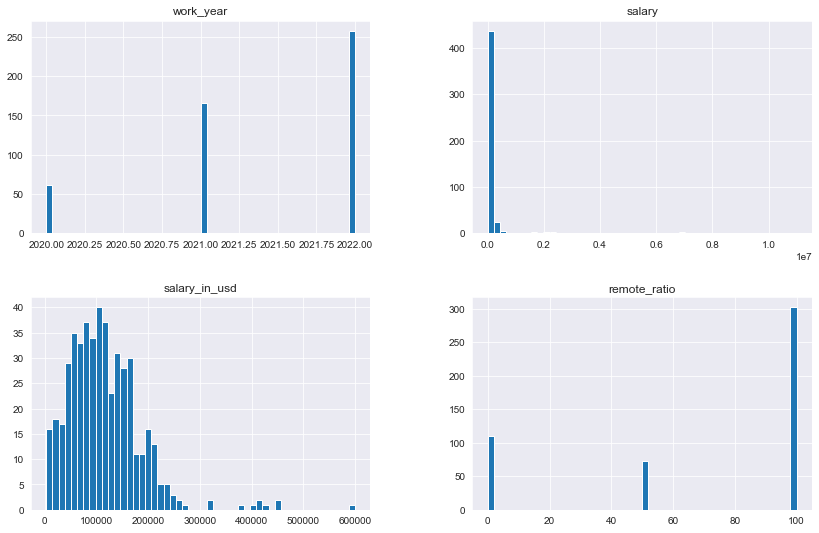

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
df_train.hist(bins=50, figsize=(14,9)) #Liczba binsów 

Text(0.5, 1.0, 'Dodged histogram')

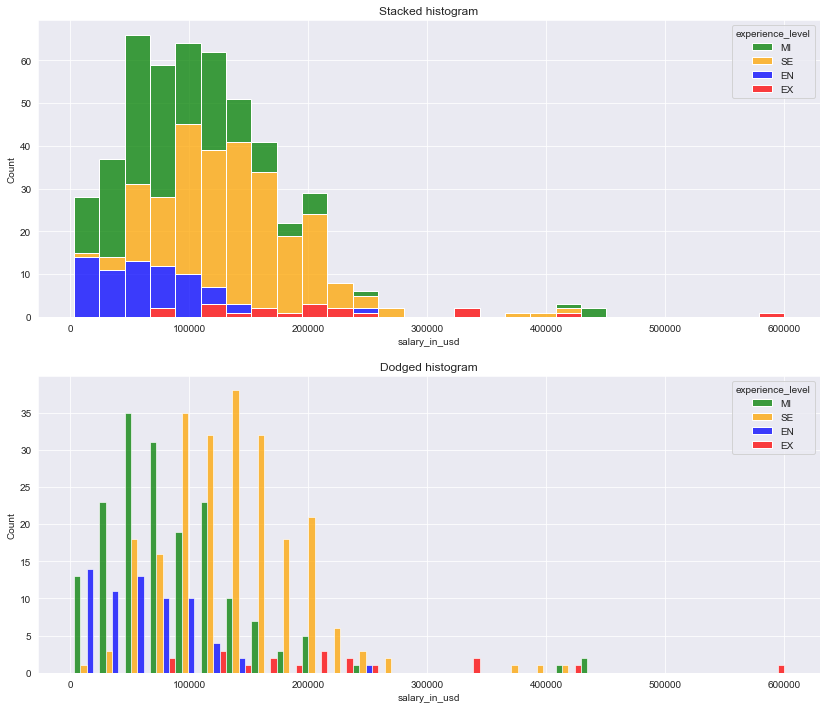

In [13]:
# Define the color palette for the experience levels
palette = {"EN": "blue", "MI": "green", "SE": "orange", "EX": "red"} #Pallete is optional, but i want make colors meaningfulls for myself to analyze

# Create a grid of two subplots, with the first subplot on top and the second one at the bottom
fig, axs = plt.subplots(2, 1, figsize=(14, 12))

# Plot the first histogram on the top subplot
sns.histplot(df_train, x="salary_in_usd", hue="experience_level", multiple="stack", ax=axs[0], palette=palette)

# Plot the second histogram on the bottom subplot
sns.histplot(df_train, x="salary_in_usd", hue="experience_level", multiple="dodge", ax=axs[1], palette=palette)

# Add titles to the subplots
axs[0].set_title("Stacked histogram")
axs[1].set_title("Dodged histogram")



### Analyze correlation and pairplots
We may want to select columns here due to 2 reasons:
- We may **dont want** to some columns with **repeated informations** (f.e. we need to drop salary when we are predicting salary_in_usd because it is same thing)
- We may to select only **most corelated** columns **if** we have **too many numerical columns** to analyze them all

In [14]:
df_train.columns #Show all column names to determine which are wanted

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [15]:
df_train = df_train[['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size']]

In [16]:
corr_matrix = df_train.corr()
corr_matrix

,work_year,salary_in_usd,remote_ratio
work_year,1.000000,0.173068,0.063566
salary_in_usd,0.173068,1.000000,0.151107
remote_ratio,0.063566,0.151107,1.000000


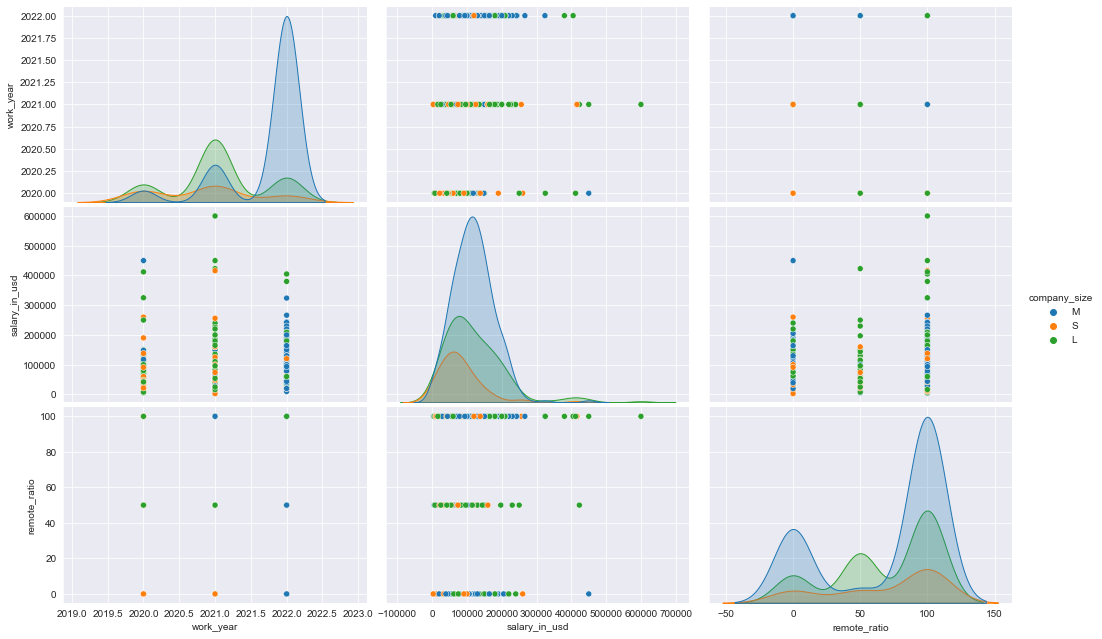

In [17]:
sns.pairplot(df_train, height=3, aspect=1.6, hue='company_size')

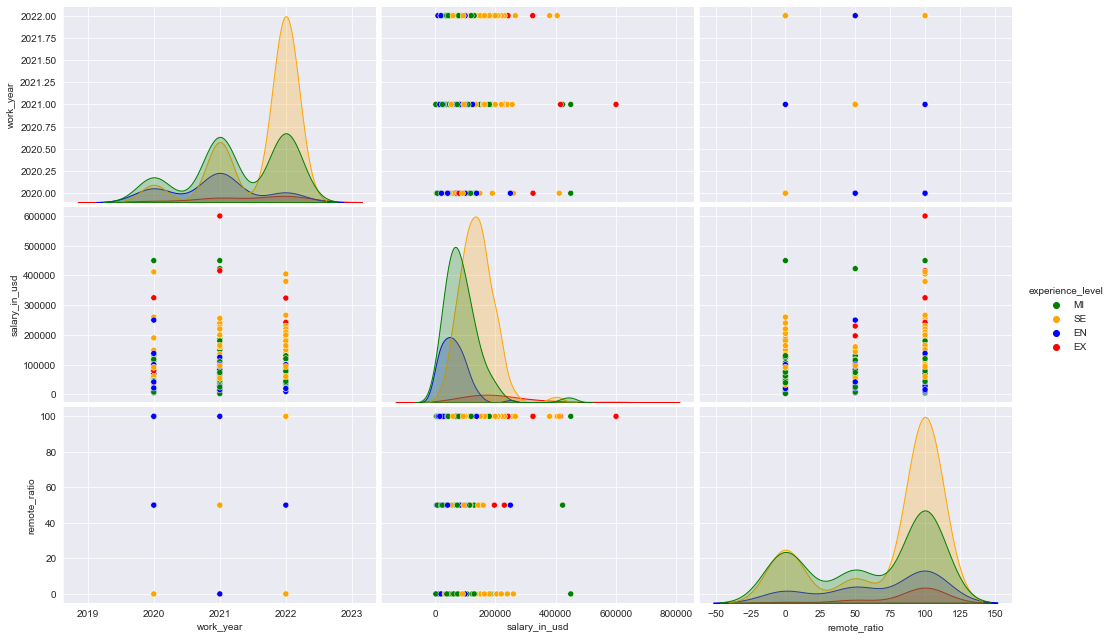

In [18]:
sns.pairplot(df_train, height=3, aspect=1.6, hue='experience_level', palette=palette,)

# Data transformations

### Import and define encoders

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

class NewColGenerator(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_generate):
        if 'employee_in_company_location' in columns_to_generate:
            self.employee_in_company_location = True
        else:
            self.employee_in_company_location = False

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.employee_in_company_location:
            X['employee_in_company_location'] = (X['employee_residence'] == X['company_location']).astype(int)
        return X

class OneHotEncoderForGivenColumns(BaseEstimator, TransformerMixin):  
    def __init__(self, columns_to_encode=None):
        if columns_to_encode is None:
            self.columns_to_encode = []
        else:
            self.columns_to_encode = columns_to_encode
        self.encoded_columns = None

    def fit(self, X, y=None):
        self.encoded_columns = pd.get_dummies(X, columns=self.columns_to_encode).columns
        return self

    def transform(self, X):
        X_new = pd.get_dummies(X, columns=self.columns_to_encode, dtype=int)
        return X_new.reindex(columns=self.encoded_columns, fill_value=0)


### Create pipeline

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(transform_output = "pandas")

ct = ColumnTransformer(
    [
        # ('standardscaler', StandardScaler(), ['salary_in_usd']),
        ('minmaxscaler', MinMaxScaler(), ['work_year', 'remote_ratio']),
        ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']),
    ],
    remainder='passthrough')


preprocess_pipeline = make_pipeline(
    NewColGenerator(['employee_in_company_location']), #It wasn't workign with column_transformer so i extracted it here
    ct
)


### Fit pipeline and save pipeline

In [21]:
df_train_transformed_features = df_train.drop('salary_in_usd', axis=1)
df_train_targets = df_train['salary_in_usd']
df_train_transformed_features = preprocess_pipeline.fit_transform(df_train_transformed_features)

In [22]:
from joblib import dump, load
dump(preprocess_pipeline, r'..\datasets\joblibs\ds_salaries_pipe.joblib')

['..\\datasets\\joblibs\\ds_salaries_pipe.joblib']

### Preview and save transformed train data

In [23]:
df_train_transformed = df_train_transformed_features.copy()
df_train_transformed['salary_in_usd'] = df_train_targets
df_train_transformed.head()

,minmaxscaler__work_year,minmaxscaler__remote_ratio,ohe__experience_level_EN,ohe__experience_level_EX,ohe__experience_level_MI,ohe__experience_level_SE,ohe__employment_type_CT,ohe__employment_type_FL,ohe__employment_type_FT,ohe__employment_type_PT,...,ohe__company_location_RU,ohe__company_location_SI,ohe__company_location_TR,ohe__company_location_US,ohe__company_location_VN,ohe__company_size_L,ohe__company_size_M,ohe__company_size_S,remainder__employee_in_company_location,salary_in_usd
329,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,115500
481,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,65000
124,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,10354
195,0.5,0.5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,147000
180,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,22611


In [24]:
dump(df_train_transformed, r'..\datasets\joblibs\ds_salaries_train.joblib')

['..\\datasets\\joblibs\\ds_salaries_train.joblib']

# Data exploration after transofmations

### Check new features corelation with target

In [25]:
%%capture 
#%%Capture command pregvents cell from printing its output - I screenshoted it and commented so i dont want to have it doubled
print("Features most corelated with target (absoolute value of negative or positive corelation):")
print(abs(df_train_transformed.corr().unstack()).sort_values(ascending=False)['salary_in_usd'].head(8))

print("\n\nFeatures least corelated with target (Probably OHE columns that has only few positive values):")
print(abs(df_train_transformed.corr().unstack()).sort_values(ascending=False)['salary_in_usd'].tail(8)) ;

![](../img/2023-04-18-19-18-42.png)

In [26]:
print("\n\nColeration of all columns (negative correlation has valeus below zeros)")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_train_transformed.corr().unstack().sort_values(ascending=False)['salary_in_usd'])



Coleration of all columns (negative correlation has valeus below zeros)
salary_in_usd                                              1.000000
ohe__employee_residence_US                                 0.537967
ohe__company_location_US                                   0.500823
ohe__experience_level_SE                                   0.319960
ohe__experience_level_EX                                   0.289591
ohe__job_title_Principal Data Engineer                     0.232329
ohe__job_title_Financial Data Analyst                      0.210035
ohe__job_title_Data Analytics Lead                         0.181860
minmaxscaler__work_year                                    0.173068
minmaxscaler__remote_ratio                                 0.151107
ohe__job_title_Principal Data Scientist                    0.150167
ohe__job_title_Data Architect                              0.143999
remainder__employee_in_company_location                    0.121895
ohe__job_title_Director of Data Science   

### Use PCA to visualize transformed data
```
This part is mostly for show how it could be done.
That specific dataset is not well fitted to our needs and there won't be many importand things to find out
```

In [27]:
%%capture
# Lets start to check how well features are corelated:
corr = df_train_transformed.corr()
corr.where((abs(corr) != 1)).stack().sort_values()

![](../img/2023-04-18-19-47-40.png)

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15) #We want to test more components to get some knowledge about how good specific nubmer of features would describe our data
pca.fit(df_train_transformed_features)
pca.explained_variance_ratio_

array([0.19042171, 0.1064898 , 0.08303093, 0.0622399 , 0.05741014,
       0.04924127, 0.04235983, 0.03879823, 0.03161823, 0.02325175,
       0.02260672, 0.02162243, 0.01823461, 0.01766611, 0.01538689])

In [29]:
(
    sum([0.18870155, 0.10622821, 0.07971659, 0.0617774 , 0.05637235,]), # With using PCA to generate 5 columns we may cover 49% of information
    sum([0.04705159, 0.04150098, 0.03871439, 0.02943738, 0.02383841,]), #Another 5 adds 18%
    sum([0.02219462, 0.02176459, 0.0213826 , 0.01794568, 0.01611487]) # Next 5 is 9% more
)

(0.4927961, 0.18054275, 0.09940236)

In [30]:
pca = PCA(n_components=5) #Lets try with 5 features
pca.fit(df_train_transformed_features)
df_reduced = pca.transform(df_train_transformed_features)
df_reduced_with_targets = df_reduced.copy()
df_reduced_with_targets['salary_in_usd'] = df_train_targets
df_reduced_with_targets

,pca0,pca1,pca2,pca3,pca4,salary_in_usd
329,-0.488909,0.385673,-0.982119,-0.464285,-0.444328,115500
481,0.348831,-0.000145,1.166903,-0.051653,-0.285793,65000
124,0.499578,0.811916,0.516893,-0.710096,-0.648877,10354
195,0.386987,-0.895636,-0.990259,-0.242229,0.736353,147000
180,1.453145,-0.300350,-0.209413,0.395594,0.225149,22611
...,...,...,...,...,...,...
487,0.486386,0.760179,0.465517,-0.791449,0.398489,100000
387,-1.063262,0.300875,0.152531,-0.149750,0.143541,164000
341,-1.147938,0.199252,0.018111,0.512764,-0.289592,93700
417,0.474648,-0.527366,0.866047,0.617902,0.041721,60000


In [31]:
df_reduced_with_targets.corr()

,pca0,pca1,pca2,pca3,pca4,salary_in_usd
pca0,1.000000e+00,3.561621e-16,3.021526e-16,4.376212e-17,-7.306382e-16,-0.464314
pca1,3.561621e-16,1.000000e+00,-1.074249e-16,4.844548e-16,4.658570e-16,-0.295086
pca2,3.021526e-16,-1.074249e-16,1.000000e+00,8.565157e-16,5.498516e-16,-0.090349
pca3,4.376212e-17,4.844548e-16,8.565157e-16,1.000000e+00,1.160201e-16,0.119383
pca4,-7.306382e-16,4.658570e-16,5.498516e-16,1.160201e-16,1.000000e+00,0.089689
salary_in_usd,-4.643143e-01,-2.950863e-01,-9.034941e-02,1.193827e-01,8.968920e-02,1.000000


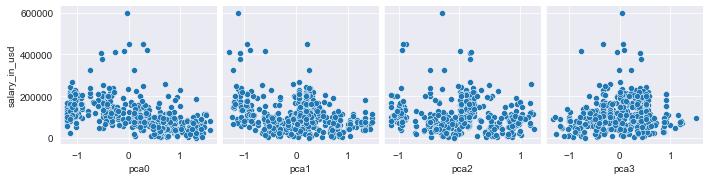

In [32]:
sns.pairplot(df_reduced_with_targets, y_vars='salary_in_usd', x_vars=['pca0','pca1','pca2','pca3'])

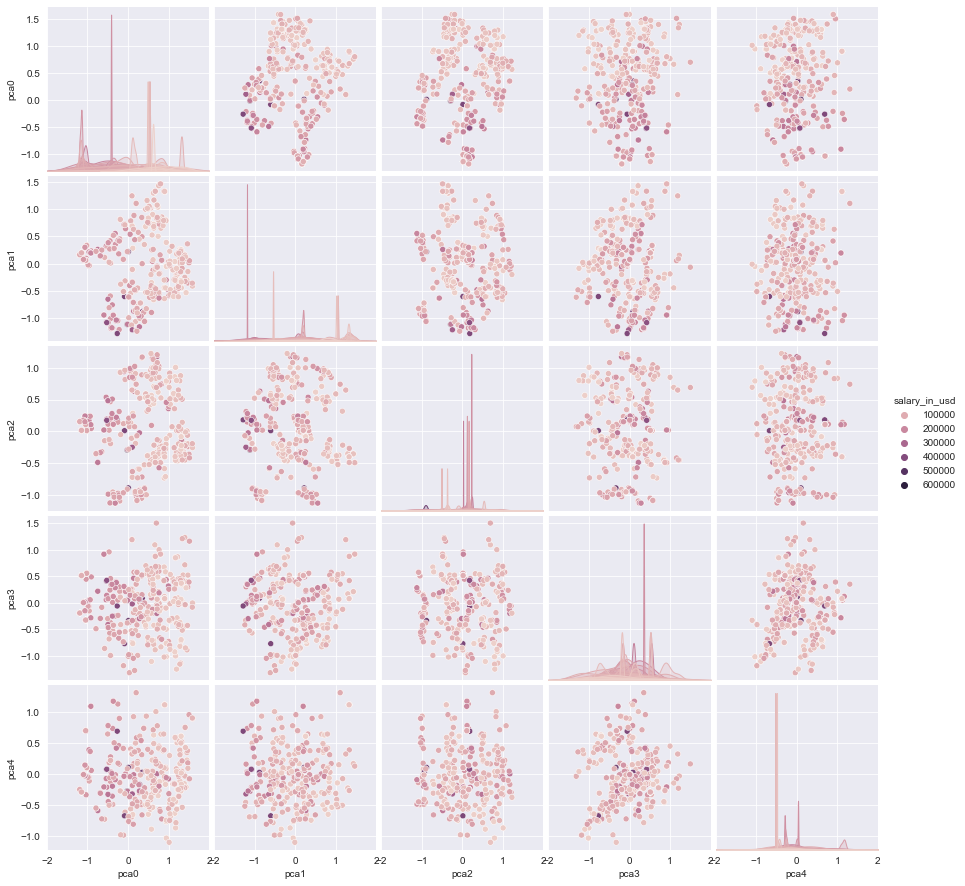

In [33]:
scatterplot = sns.pairplot(df_reduced_with_targets, hue='salary_in_usd')

for ax in scatterplot.axes.flatten():
    ax.set_xlim(-2,2) #Force plots to have maximum X axis = 2 (instead of 4 for some automatic cases)

![](../img/2023-04-18-20-50-01.png)

Preview one of above plots with more details:

<AxesSubplot: xlabel='pca4', ylabel='pca1'>

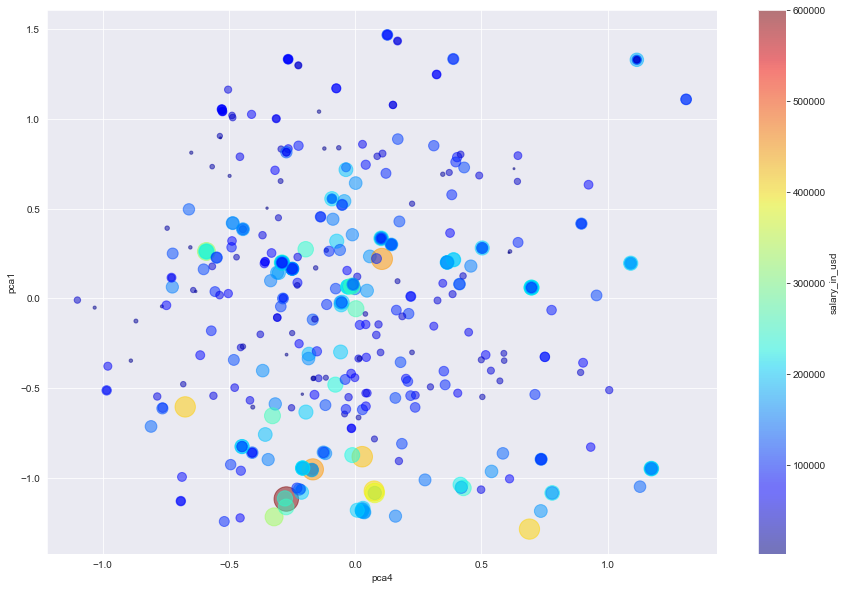

In [34]:
df_reduced_with_targets.plot(kind="scatter", x="pca4", y="pca1", alpha=0.5,
    figsize=(15,10),
    s=df_reduced_with_targets["salary_in_usd"]/1000,
    c="salary_in_usd", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

All of this exploration suggests, that simple models may don't predict our data very well. <br/>
We have very limited nubmer of samples and our data has not clear patterns visible.

# Prepare and transform test data for models

### Transform, preview and save test data

In [35]:
df_test_transformed = df_test.drop('salary_in_usd', axis=1)
df_test_targets = df_test['salary_in_usd']
df_test_transformed = preprocess_pipeline.transform(df_test_transformed)

df_test_transformed['salary_in_usd'] = df_test_targets
df_test_transformed.head()

,minmaxscaler__work_year,minmaxscaler__remote_ratio,ohe__experience_level_EN,ohe__experience_level_EX,ohe__experience_level_MI,ohe__experience_level_SE,ohe__employment_type_CT,ohe__employment_type_FL,ohe__employment_type_FT,ohe__employment_type_PT,...,ohe__company_location_RU,ohe__company_location_SI,ohe__company_location_TR,ohe__company_location_US,ohe__company_location_VN,ohe__company_size_L,ohe__company_size_M,ohe__company_size_S,remainder__employee_in_company_location,salary_in_usd
451,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,78791
423,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,180000
278,0.5,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,20171
191,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,21844
435,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,91614


In [36]:
dump(df_test_transformed, r'..\datasets\joblibs\ds_salaries_test.joblib')

['..\\datasets\\joblibs\\ds_salaries_test.joblib']

# Fit some models with default parameters

### Import and define models

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [38]:
from sklearn.linear_model import LinearRegression, BayesianRidge, Lasso, ElasticNet, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR

models = {
    'LinearRegression':LinearRegression(), 
    'DecisionTreeRegressor':DecisionTreeRegressor(random_state=1321), 
    'RandomForestRegressor':RandomForestRegressor(n_estimators=100, random_state=1321), 
    'SVR':SVR(kernel="linear"), 
    'BayesianRidge': BayesianRidge(),
    'Lasso': Lasso(max_iter=50000),
    'ElasticNet': ElasticNet(),
    'Ridge': Ridge(),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=1321),
    'SGDRegressor': SGDRegressor(random_state=1321),
    'SVR_rbf': SVR(kernel="rbf"),
    'ExampleNeuralNetwork_with_100_relu_activations': MLPRegressor(random_state=1321, max_iter=10000),
}

### Fit all imported models and print their errors

In [39]:
#Just to be sure about shape of our datasets to prevent problems like unintentionally overriding training set with all data :)
print("Shapes of all/train/test datasets", df.shape, df_train_transformed.shape, df_test_transformed.shape, "\n")

#Create DF to keep (and sort) results of our training
df_results = pd.DataFrame([], columns=['Model name', 'Train RMSE', 'Train MAE', 'Test RMSE', 'Test MAE'])

for index, (name, model) in enumerate(models.items()):
    #Print progress
    print(f"Fitting of [{name.center(40)}] model started. \t All models completion: [{index:3d} / {len(models):3d}]. \t {datetime.now()}")

    #Fit model
    model.fit(df_train_transformed.drop('salary_in_usd', axis=1), df_train_transformed['salary_in_usd'])

    #Training data:
    y_pred_train = model.predict(df_train_transformed.drop('salary_in_usd', axis=1))
    train_mse = mean_squared_error(df_train_transformed['salary_in_usd'], y_pred_train)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(df_train_transformed['salary_in_usd'], y_pred_train)

    #Test data
    y_pred_test = model.predict(df_test_transformed.drop('salary_in_usd', axis=1))
    test_mse = mean_squared_error(df_test_transformed['salary_in_usd'], y_pred_test)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(df_test_transformed['salary_in_usd'], y_pred_test)

    #Add results to results dataframe
    row = [name, train_rmse, train_mae, test_rmse, test_mae]
    df_results = df_results.append(pd.DataFrame([row], columns=df_results.columns))

Shapes of all/train/test datasets (607, 11) (485, 152) (122, 152) 

Fitting of [            LinearRegression            ] model started. 	 All models completion: [  0 /  12]. 	 2023-04-23 00:31:19.656603
Fitting of [         DecisionTreeRegressor          ] model started. 	 All models completion: [  1 /  12]. 	 2023-04-23 00:31:19.697612
Fitting of [         RandomForestRegressor          ] model started. 	 All models completion: [  2 /  12]. 	 2023-04-23 00:31:19.708614
Fitting of [                  SVR                   ] model started. 	 All models completion: [  3 /  12]. 	 2023-04-23 00:31:19.983676
Fitting of [             BayesianRidge              ] model started. 	 All models completion: [  4 /  12]. 	 2023-04-23 00:31:20.011682
Fitting of [                 Lasso                  ] model started. 	 All models completion: [  5 /  12]. 	 2023-04-23 00:31:20.080698
Fitting of [               ElasticNet               ] model started. 	 All models completion: [  6 /  12]. 	 2023-04

c:\Users\salamander\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
with pd.option_context("display.float_format", "{:.2f}".format): #To prevent pandas to generete e+15 format
    display(df_results.sort_values(by='Test RMSE', ascending=True).reset_index(drop=True))

,Model name,Train RMSE,Train MAE,Test RMSE,Test MAE
0,ExampleNeuralNetwork_with_100_relu_activations,51185.82,32419.91,37322.07,29747.12
1,SGDRegressor,46912.48,31325.49,38198.19,29850.51
2,BayesianRidge,44271.11,29622.30,39302.91,30059.53
3,GradientBoostingRegressor,36846.04,26872.26,43450.66,31061.57
4,Ridge,41708.39,28170.12,43479.35,31780.50
5,RandomForestRegressor,28865.32,19502.50,47593.62,33041.97
6,ElasticNet,60653.13,40733.40,47632.75,38163.31
7,SVR,73157.05,52350.42,62771.84,50078.78
8,SVR_rbf,73246.74,52468.42,62907.33,50218.10
9,Lasso,38753.89,25576.23,67880.38,41080.41


The best models above are neural network and SGD Regressor

**NOTE: Models above has lower error on test dataset than in train. I was looking for possible reasons for that and found that:**
- Current test/trains split with random_state=1321 splits data into subsets with different mean
- TEST mean of salary is 10% higher than TRAIN
- While we have bigger salaries in some dataset, naturaly we may have also bigger errors 

After changing random_state for testing to value 321 (Which has almost the same MEANS in TEST and TRAIN sets):
- Test sets has much worse results that train sets:

![](../img/2023-04-25-23-05-01.png)

# Analyze deeper some best of basic models

### Analyze DecisionTreeRgressor (CHECK NOTE)
```
NOTE:
Normaly we would pick best model from our basic test.
Howver, I had error in my code (i overrided training set) when i was checking models.

After that i made deeper analyze of DecisionTreeRegressor.
I am keeping it just as another example of analyzing models.
```

#### Select trained model and make predictions for test data with first model

In [41]:
model = models['DecisionTreeRegressor'] #Model is already fited

# Lest generate predictions once again
y_pred = model.predict(df_test_transformed.drop('salary_in_usd', axis=1))

#And test if we have the same values that we are expecting
mse = mean_squared_error(df_test_transformed['salary_in_usd'], y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df_test_transformed['salary_in_usd'], y_pred)
print(f" | TEST - RMSE: {rmse:.4f}; MAE:{mae:.4f}")

 | TEST - RMSE: 72163.9273; MAE:42174.4737


#### Print targets, predictions and its differences on plots

##### Basic version

Text(0.5, 1.0, 'Differences between prediction and target')

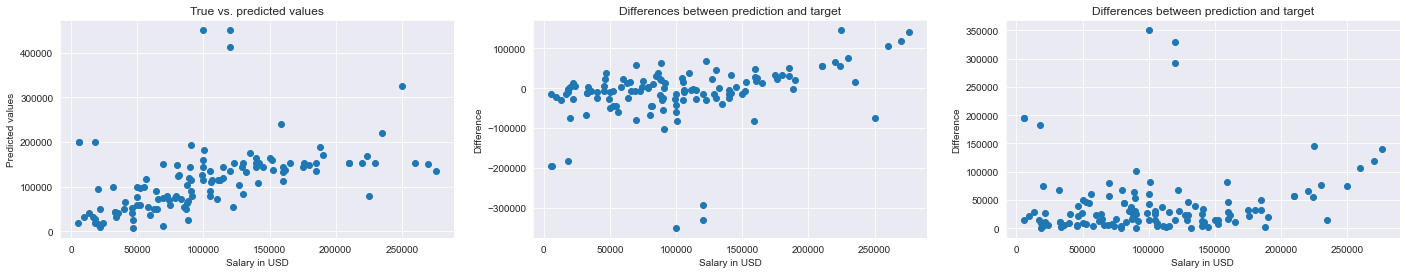

In [42]:
# Basic  version in case someone needed shorter code.
# It is possible to print only one chart with:
"""
plt.scatter(df_test_transformed['salary_in_usd'], y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True vs. predicted values')
"""
fig, axes = plt.subplots(ncols=3, figsize=(24, 4))

axes[0].scatter(df_test_transformed['salary_in_usd'], y_pred)
axes[0].set_xlabel('Salary in USD')
axes[0].set_ylabel('Predicted values')
axes[0].set_title('True vs. predicted values')

axes[1].plot(df_test_transformed['salary_in_usd'], df_test_transformed['salary_in_usd'] - y_pred, marker='o', linestyle='') #Ordered by salary from lowest to highest
axes[1].set_xlabel('Salary in USD')
axes[1].set_ylabel('Difference')
axes[1].set_title('Differences between prediction and target')

axes[2].plot(df_test_transformed['salary_in_usd'], abs(df_test_transformed['salary_in_usd'] - y_pred), marker='o', linestyle='') #Ordered by salary from lowest to highest
axes[2].set_xlabel('Salary in USD')
axes[2].set_ylabel('Difference')
axes[2].set_title('Differences between prediction and target')

##### Colored version

(None, None, None)

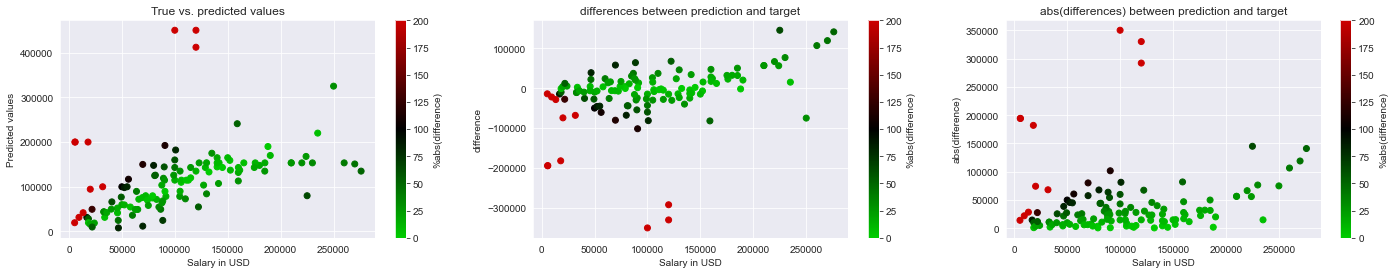

In [43]:
# Version with adding colors bassing on % difference to target
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# calculate extra variables to prevent repeating of calculations
diff = df_test_transformed['salary_in_usd'] - y_pred
abs_diff = abs(diff)
pct_diff = abs_diff / df_test_transformed['salary_in_usd'] * 100

# Set size of charts and configure colormap
fig, axes = plt.subplots(ncols=3, figsize=(24, 4))
vmin, vmax = 0, 200 #We want to highlight if model has difference above 50%; With default range sample that has over 3000% destroys colormap
norm = plt.Normalize(vmin=vmin, vmax=vmax)

#Define own cmap colors
colors = [(0, '#00cc00'), (0.5, '#000000'), (1, '#cc0000'),]
cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

# Plot values
sc1 = axes[0].scatter(df_test_transformed['salary_in_usd'], y_pred,  c=pct_diff, cmap=cmap, norm=norm)
axes[0].set_xlabel('Salary in USD')
axes[0].set_ylabel('Predicted values')
axes[0].set_title('True vs. predicted values')

# Plot differences
sc2 = axes[1].scatter(df_test_transformed['salary_in_usd'], diff, c=pct_diff, cmap=cmap, norm=norm)
axes[1].set_xlabel('Salary in USD')
axes[1].set_ylabel('difference')
axes[1].set_title('differences between prediction and target')

# Plot abs differences
sc3 = axes[2].scatter(df_test_transformed['salary_in_usd'], abs_diff, c=pct_diff, cmap=cmap, norm=norm)
axes[2].set_xlabel('Salary in USD'),
axes[2].set_ylabel('abs(difference)')
axes[2].set_title('abs(differences) between prediction and target')

cbar1, cbar2, cbar3 = fig.colorbar(sc1), fig.colorbar(sc2), fig.colorbar(sc3)
cbar1.set_label(r'%abs(difference)'), cbar2.set_label(r'%abs(difference)'), cbar3.set_label(r'%abs(difference)')


##### Check histogram of differences

<AxesSubplot: >

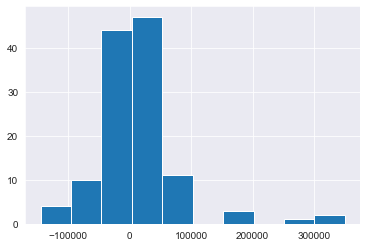

In [44]:
df_pred_vs_target = df_test_transformed[['salary_in_usd']].copy()
df_pred_vs_target['prediction'] = y_pred
df_pred_vs_target['difference'] = df_pred_vs_target['prediction'] - df_pred_vs_target['salary_in_usd'] 
df_pred_vs_target['difference'].hist()

### Analyze different model

#### Select trained model and make predictions for test data with different model

In [45]:
model = models['LinearRegression'] #Model is already fited

# Lest generate predictions once again
y_pred = model.predict(df_test_transformed.drop('salary_in_usd', axis=1))

#And test if we have the same values that we are expecting
mse = mean_squared_error(df_test_transformed['salary_in_usd'], y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df_test_transformed['salary_in_usd'], y_pred)
print(f" | TEST - RMSE: {rmse:.4f}; MAE:{mae:.4f}")


 | TEST - RMSE: 8577073487264117.0000; MAE:2410845523762543.0000


#### Print targets, predictions and its differences on plots for differrent model

(None, None, None)

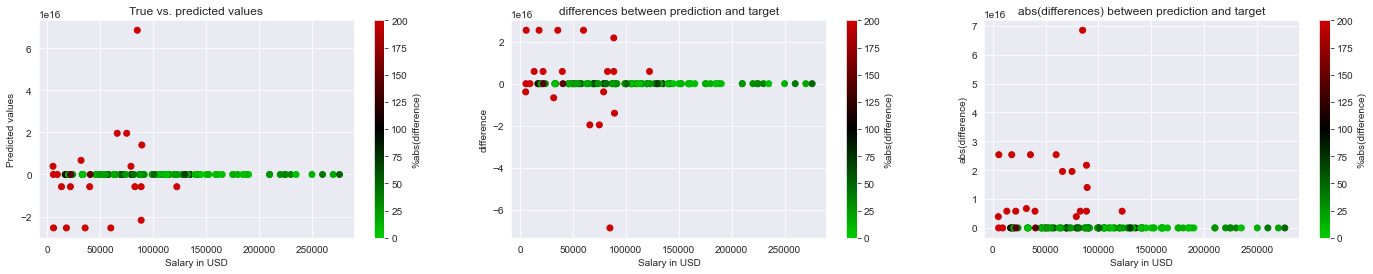

In [46]:
# Version with adding colors bassing on % difference to target
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# calculate extra variables to prevent repeating of calculations
diff = df_test_transformed['salary_in_usd'] - y_pred
abs_diff = abs(diff)
pct_diff = abs_diff / df_test_transformed['salary_in_usd'] * 100

# Set size of charts and configure colormap
fig, axes = plt.subplots(ncols=3, figsize=(24, 4))
vmin, vmax = 0, 200 #We want to highlight if model has difference above 50%; With default range sample that has over 3000% destroys colormap
norm = plt.Normalize(vmin=vmin, vmax=vmax)

#Define own cmap colors
colors = [(0, '#00cc00'), (0.5, '#000000'), (1, '#cc0000'),]
cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

# Plot values
sc1 = axes[0].scatter(df_test_transformed['salary_in_usd'], y_pred,  c=pct_diff, cmap=cmap, norm=norm)
axes[0].set_xlabel('Salary in USD')
axes[0].set_ylabel('Predicted values')
axes[0].set_title('True vs. predicted values')

# Plot differences
sc2 = axes[1].scatter(df_test_transformed['salary_in_usd'], diff, c=pct_diff, cmap=cmap, norm=norm)
axes[1].set_xlabel('Salary in USD')
axes[1].set_ylabel('difference')
axes[1].set_title('differences between prediction and target')

# Plot abs differences
sc3 = axes[2].scatter(df_test_transformed['salary_in_usd'], abs_diff, c=pct_diff, cmap=cmap, norm=norm)
axes[2].set_xlabel('Salary in USD'),
axes[2].set_ylabel('abs(difference)')
axes[2].set_title('abs(differences) between prediction and target')

cbar1, cbar2, cbar3 = fig.colorbar(sc1), fig.colorbar(sc2), fig.colorbar(sc3)
cbar1.set_label(r'%abs(difference)'), cbar2.set_label(r'%abs(difference)'), cbar3.set_label(r'%abs(difference)')


In [47]:
#  Analyze predictions of linear regression
print(f"mean    = {np.mean(y_pred):4f}")
print(f"std_dev = {np.std(y_pred):4f}")
print(f"min_val = {np.min(y_pred):4f}")
print(f"max_val = {np.max(y_pred):4f}")
print(f"pct_25 = {np.percentile(y_pred, 25):4f}")
print(f"pct_50 = {np.percentile(y_pred, 50):4f}")
print(f"pct_75 = {np.percentile(y_pred, 75):4f}")

mean    = -179029496556535.593750
std_dev = 8575204839847584.000000
min_val = -25366736779469056.000000
max_val = 68485102661454592.000000
pct_25 = 50304.000000
pct_50 = 120320.000000
pct_75 = 153600.000000


##### Filter out outliners to make plot readable

In [48]:
Q1 = np.percentile(y_pred, 25)
Q3 = np.percentile(y_pred, 75)
IQR = Q3 - Q1
threshold = 1.5 * IQR

outliers = (y_pred < Q1 - threshold) + (y_pred > Q3 + threshold)

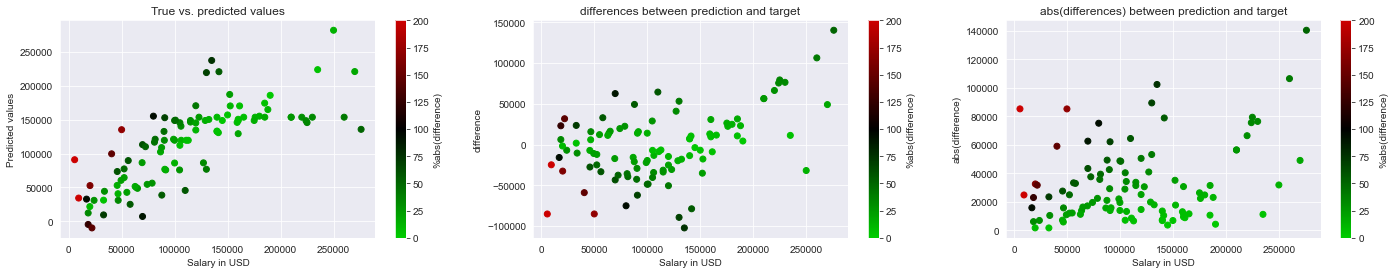

In [49]:
fig, axes = plt.subplots(ncols=3, figsize=(24, 4))

sc1 = axes[0].scatter(df_test_transformed['salary_in_usd'][~outliers], y_pred[~outliers],  c=pct_diff[~outliers], cmap=cmap, norm=norm)
axes[0].set_xlabel('Salary in USD')
axes[0].set_ylabel('Predicted values')
axes[0].set_title('True vs. predicted values')

# Plot differences
sc2 = axes[1].scatter(df_test_transformed['salary_in_usd'][~outliers], diff[~outliers], c=pct_diff[~outliers], cmap=cmap, norm=norm)
axes[1].set_xlabel('Salary in USD')
axes[1].set_ylabel('difference')
axes[1].set_title('differences between prediction and target')

# Plot abs differences
sc3 = axes[2].scatter(df_test_transformed['salary_in_usd'][~outliers], abs_diff[~outliers], c=pct_diff[~outliers], cmap=cmap, norm=norm)
axes[2].set_xlabel('Salary in USD'),
axes[2].set_ylabel('abs(difference)')
axes[2].set_title('abs(differences) between prediction and target')

cbar1, cbar2, cbar3 = fig.colorbar(sc1), fig.colorbar(sc2), fig.colorbar(sc3)
cbar1.set_label(r'%abs(difference)'), cbar2.set_label(r'%abs(difference)'), cbar3.set_label(r'%abs(difference)');


# Find best hiperparameters for DecissionTreeRegressor

### Plot basic hiperparameters to better understand data
Normaly we can just create huge param_grid and find best version. <br />
However, for large datasets it may take too long time and it may be worth to understand when model starts to overfit

#### min_samples_split

In [50]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeRegressor(random_state=1321)

param_grid = [
    {'min_samples_split': [2, 4, 8, 12, 16, 20, 24, 28, 32, 40, 48, 52, 56, 60, 70, 80, 100, 120, 160, 200, 240, 280, 320, 340, 380, 420, 500, 700]},
]

In [51]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

In [52]:
%%capture
grid_search.fit(df_train_transformed.drop('salary_in_usd', axis=1), df_train_transformed['salary_in_usd'])

In [53]:
cvres = grid_search.cv_results_
print("Best estimator: ", grid_search.best_estimator_, "\n")

for index, (mean_train_score, mean_cv_score, params) in enumerate(zip(cvres["mean_train_score"], cvres["mean_test_score"], cvres["params"])):
    print(params, np.sqrt(-mean_train_score), np.sqrt(-mean_cv_score))
    if index>5: 
        print("...")
        break

Best estimator:  DecisionTreeRegressor(min_samples_split=100, random_state=1321) 

{'min_samples_split': 2} 22657.463468049802 63760.586852182954
{'min_samples_split': 4} 27655.792549409864 63912.231800068446
{'min_samples_split': 8} 31266.404688373495 62416.33122057326
{'min_samples_split': 12} 34704.761508246454 62757.56973402884
{'min_samples_split': 16} 35244.99144548717 61179.47263882477
{'min_samples_split': 20} 35810.60221117675 61652.483726482984
{'min_samples_split': 24} 36392.750029096605 61654.7934034812
...


In [54]:
%%capture
import matplotlib.pyplot as plt

cvres = grid_search.cv_results_

min_samples = [params['min_samples_split'] for params in cvres['params']]
train_errors = [np.sqrt(-score) for score in cvres['mean_train_score']]
cv_errors = [np.sqrt(-score) for score in cvres['mean_test_score']]


fig = plt.figure(figsize=(16, 10))
plt.plot(min_samples, train_errors, label='Training Error')
plt.plot(min_samples, cv_errors, label='CV Error')
plt.xlabel('min_samples_split')
plt.ylabel('RMSE')
plt.title('CV and Test Errors vs min_samples_split')
plt.legend()

![](../img/2023-04-20-23-30-07.png)

#### max_depth

In [55]:
param_grid = [
    {'max_depth': [1, 2, 4, 8, 16, 32, 64]},
]
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(df_train_transformed.drop('salary_in_usd', axis=1), df_train_transformed['salary_in_usd'])
cvres = grid_search.cv_results_
print("Best estimator: ", grid_search.best_estimator_)
for mean_train_score, mean_cv_score, params in zip(cvres["mean_train_score"], cvres["mean_test_score"], cvres["params"]):
    print(params, np.sqrt(-mean_train_score), np.sqrt(-mean_cv_score))

Best estimator:  DecisionTreeRegressor(max_depth=4, random_state=1321)
{'max_depth': 1} 61179.88316838276 61355.55653420577
{'max_depth': 2} 57080.84835777855 62102.59071063462
{'max_depth': 4} 47628.5531649846 59489.59863757113
{'max_depth': 8} 34735.79489404675 60463.01128494206
{'max_depth': 16} 24218.60548965222 63044.18543948284
{'max_depth': 32} 22657.463468049802 63760.586852182954
{'max_depth': 64} 22657.463468049802 63760.586852182954


In [56]:
%%capture
cvres = grid_search.cv_results_

min_samples = [params['max_depth'] for params in cvres['params']]
train_errors = [np.sqrt(-score) for score in cvres['mean_train_score']]
cv_errors = [np.sqrt(-score) for score in cvres['mean_test_score']]


fig = plt.figure(figsize=(20, 6))
plt.plot(min_samples, train_errors, label='Training Error')
plt.plot(min_samples, cv_errors, label='CV Error')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.title('CV and Test Errors vs min_samples_split')
plt.legend()

![](../img/2023-04-20-23-38-08.png)

#### Determining if we have high bias/variance and what to do:
While preparing model we should ask ourselves some questions:

**Does it make good prediction on training dataset?**
- IF NO - then we have HIGH BIAS - use more complicated model/more features/more complexity
- IF YES - test on CV set

**Does it make good predictions on CV set?**
- IF NO - then we have HIGH VARIANCE - collect more data
- IF YES - then we have our model

As we could see during printing 2 hiperparameters plot
- When we want small difference between CV and TRAIN (we want low ovefit) then error is around 50k (Much higher than best training scores)
- That suggests that we should get more data to make good predictions

### Search for best parameters

In [57]:
param_grid = [
    {
        'max_depth': [1, 2, 3, 4, 8],
        'min_samples_split': [180, 200, 220, 240, 260, 280, 300, 320],
        'min_samples_leaf': [1, 2, 3],
        'max_leaf_nodes': [None, 5, 10],
        'min_impurity_decrease': [0.0, 0.1, 0.2]
    },
    {'max_depth':[None,], 'min_samples_leaf':[1,], 'min_samples_split':[2,], 'random_state':[1321,]}, #defaut one
]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(df_train_transformed.drop('salary_in_usd', axis=1), df_train_transformed['salary_in_usd'])
cvres = grid_search.cv_results_
print("Best estimator: ", grid_search.best_estimator_)
# for mean_train_score, mean_cv_score, params in zip(cvres["mean_train_score"], cvres["mean_test_score"], cvres["params"]):
#     print(params, np.sqrt(-mean_train_score), np.sqrt(-mean_cv_score))

best_index = grid_search.best_index_
mean_train_score, mean_cv_score, params = cvres["mean_train_score"][best_index], cvres["mean_test_score"][best_index], cvres["params"][best_index]
print(params, np.sqrt(-mean_train_score), np.sqrt(-mean_cv_score))

Best estimator:  DecisionTreeRegressor(max_depth=3, min_samples_leaf=2, min_samples_split=180,
                      random_state=1321)
{'max_depth': 3, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 180} 56868.45970871896 60617.66538763599


#### Test best hiperparameters
We found best versin of model:
DecisionTreeRegressorDecisionTreeRegressor(max_depth=3, min_samples_leaf=2, min_samples_split=180, random_state=1321)

Its available in grid_search.best_estimator_

In [58]:
model = grid_search.best_estimator_

#Training data:
y_pred = model.predict(df_train_transformed.drop('salary_in_usd', axis=1))
mse = mean_squared_error(df_train_transformed['salary_in_usd'], y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df_train_transformed['salary_in_usd'], y_pred)
print(f"TRAIN - RMSE: {rmse:.4f};  MAE:{mae:.4f}", end="")

#Test data
y_pred = model.predict(df_test_transformed.drop('salary_in_usd', axis=1))
mse = mean_squared_error(df_test_transformed['salary_in_usd'], y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df_test_transformed['salary_in_usd'], y_pred)
print(f" | TEST - RMSE: {rmse:.4f}; MAE:{mae:.4f}")

TRAIN - RMSE: 55746.3692;  MAE:38159.0643 | TEST - RMSE: 42487.1219; MAE:33050.0406


In [59]:
# Lets compare with the one that has default parameters
df_results.query("`Model name` == 'DecisionTreeRegressor'")

,Model name,Train RMSE,Train MAE,Test RMSE,Test MAE
0,DecisionTreeRegressor,23535.656908,12281.723498,72163.927321,42174.473685


After updating hiperparameters we have better model than previously (New RMSE is ~42k while orginal was ~72k)

#### Compare 2 models trained with grid_search

In [60]:
param_grid = [
    {'max_depth':[None,], 'min_samples_leaf':[1,], 'min_samples_split':[2,], 'random_state':[1321,]}, #defaut one
    {'max_depth':[3,], 'min_samples_leaf':[2,], 'min_samples_split':[180,], 'random_state':[1321,]} #Best from grid
]

grid_search_test = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search_test.fit(df_train_transformed.drop('salary_in_usd', axis=1), df_train_transformed['salary_in_usd'])
cvres = grid_search_test.cv_results_
print("Best estimator: ", grid_search_test.best_estimator_)
for mean_train_score, mean_cv_score, params in zip(cvres["mean_train_score"], cvres["mean_test_score"], cvres["params"]):
    print(params, np.sqrt(-mean_train_score), np.sqrt(-mean_cv_score))

Best estimator:  DecisionTreeRegressor(max_depth=3, min_samples_leaf=2, min_samples_split=180,
                      random_state=1321)
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 1321} 22657.463468049802 63760.586852182954
{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 180, 'random_state': 1321} 56868.45970871896 60617.66538763599


# Find best hiperparameters for SGDRegressor

### Create and fit grid_search

In [61]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

model = SGDRegressor(random_state=1321)

param_grid = [
    {
        'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
        'penalty': [None, 'l1', 'l2'],
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'max_iter': [2000],
        'tol': [0.001, 0.0001, 0.00001],
        'early_stopping': [True,],
    },
    {
        'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
        'penalty': ['elasticnet'],
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'l1_ratio': [0, 0.15, 0.5, 0.85, 1], #Used only with elasticnet
        'max_iter': [2000],
        'tol': [0.001, 0.0001, 0.00001],
        'early_stopping': [True,],
    },
        ]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=1) #Verbose nalbes grid_search to print progress
grid_search.fit(df_train_transformed.drop('salary_in_usd', axis=1), df_train_transformed['salary_in_usd'])
cvres = grid_search.cv_results_
print("Best estimator: ", grid_search.best_estimator_)
# for mean_train_score, mean_cv_score, params in zip(cvres["mean_train_score"], cvres["mean_test_score"], cvres["params"]):
#     print(params, np.sqrt(-mean_train_score), np.sqrt(-mean_cv_score))

best_index = grid_search.best_index_
mean_train_score, mean_cv_score, params = cvres["mean_train_score"][best_index], cvres["mean_test_score"][best_index], cvres["params"][best_index]
print(params, np.sqrt(-mean_train_score), np.sqrt(-mean_cv_score))

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best estimator:  SGDRegressor(alpha=0.01, early_stopping=True,
             loss='squared_epsilon_insensitive', max_iter=2000,
             random_state=1321)
{'alpha': 0.01, 'early_stopping': True, 'loss': 'squared_epsilon_insensitive', 'max_iter': 2000, 'penalty': 'l2', 'tol': 0.001} 52032.62081281968 55177.00912002167


In [62]:
best_index = grid_search.best_index_
mean_train_score, mean_cv_score, params = cvres["mean_train_score"][best_index], cvres["mean_test_score"][best_index], cvres["params"][best_index]
print(params, np.sqrt(-mean_train_score), np.sqrt(-mean_cv_score))

{'alpha': 0.01, 'early_stopping': True, 'loss': 'squared_epsilon_insensitive', 'max_iter': 2000, 'penalty': 'l2', 'tol': 0.001} 52032.62081281968 55177.00912002167


In [63]:
model = grid_search.best_estimator_

#Training data:
y_pred = model.predict(df_train_transformed.drop('salary_in_usd', axis=1))
mse = mean_squared_error(df_train_transformed['salary_in_usd'], y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df_train_transformed['salary_in_usd'], y_pred)
print(f"TRAIN - RMSE: {rmse:.4f};  MAE:{mae:.4f}", end="")

#Test data
y_pred = model.predict(df_test_transformed.drop('salary_in_usd', axis=1))
mse = mean_squared_error(df_test_transformed['salary_in_usd'], y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df_test_transformed['salary_in_usd'], y_pred)
print(f" | TEST - RMSE: {rmse:.4f}; MAE:{mae:.4f}")

TRAIN - RMSE: 50949.3791;  MAE:33657.3572 | TEST - RMSE: 37329.4129; MAE:29753.5465


In [64]:
# Lets compare with the one that has default parameters
df_results.query("`Model name` == 'SGDRegressor'")

,Model name,Train RMSE,Train MAE,Test RMSE,Test MAE
0,SGDRegressor,46912.484261,31325.494808,38198.194559,29850.513166


### Train model with partial fit to plot train and validation errors

In [65]:
model = SGDRegressor(alpha= 0.1, l1_ratio= 0.5, loss= 'squared_epsilon_insensitive', max_iter= 100, penalty= 'elasticnet', tol= 0.001, random_state=1321, verbose=0)

# Split the data into training and validation sets
df_train_without_val, df_val = train_test_split(df_train_transformed, test_size=0.2, random_state=42)

X_train = df_train_without_val.drop('salary_in_usd', axis=1)
y_train = df_train_without_val['salary_in_usd']
X_val =  df_val.drop('salary_in_usd', axis=1)
y_val =  df_val['salary_in_usd']

train_rmse_list = []
val_rmse_list = []

for epoch in range(10000):
    model.partial_fit(X_train, y_train)
    # Evaluate the model on the validation set
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)

    y_val_pred = model.predict(X_val)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_rmse = np.sqrt(val_mse)

    if epoch % 500 == 0:
        print(f"Epoch {epoch}: Train RMSE = {train_rmse:.4f}, Validation RMSE = {val_rmse:.4f}")

    train_rmse_list.append(train_rmse)
    val_rmse_list.append(val_rmse)


Epoch 0: Train RMSE = 54873.8408, Validation RMSE = 72767.0466
Epoch 500: Train RMSE = 46132.5170, Validation RMSE = 63704.5721
Epoch 1000: Train RMSE = 46126.9944, Validation RMSE = 63659.0301
Epoch 1500: Train RMSE = 46125.9858, Validation RMSE = 63654.4209
Epoch 2000: Train RMSE = 46125.5993, Validation RMSE = 63655.8720
Epoch 2500: Train RMSE = 46125.4090, Validation RMSE = 63658.0792
Epoch 3000: Train RMSE = 46125.3015, Validation RMSE = 63660.1165
Epoch 3500: Train RMSE = 46125.2362, Validation RMSE = 63661.8653
Epoch 4000: Train RMSE = 46125.1952, Validation RMSE = 63663.3580
Epoch 4500: Train RMSE = 46125.1694, Validation RMSE = 63664.6448
Epoch 5000: Train RMSE = 46125.1537, Validation RMSE = 63665.7682
Epoch 5500: Train RMSE = 46125.1450, Validation RMSE = 63666.7608
Epoch 6000: Train RMSE = 46125.1411, Validation RMSE = 63667.6472
Epoch 6500: Train RMSE = 46125.1409, Validation RMSE = 63668.4461
Epoch 7000: Train RMSE = 46125.1432, Validation RMSE = 63669.1718
Epoch 7500: Tr

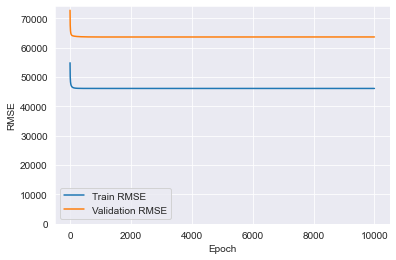

In [71]:
# Plot train_mse and val_mse
plt.plot(train_rmse_list, label='Train RMSE')
plt.plot(val_rmse_list, label='Validation RMSE')
plt.legend('Train and validation RMSE during each epoch')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.ylim([0, None]) #Make y_axis start on 0 
plt.legend()

Train error is high what suggests that model is too simple for our needs. <br/>
It may be good to pick other model or generate new features basing on the orginals

In [83]:
# Lets calculate rmse for our trained epoch-by-epoch model with test data
#Training data:
y_pred = model.predict(df_train_transformed.drop('salary_in_usd', axis=1))
mse = mean_squared_error(df_train_transformed['salary_in_usd'], y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df_train_transformed['salary_in_usd'], y_pred)
print(f"TRAIN - RMSE: {rmse:.4f};  MAE:{mae:.4f}", end="")

#train data
y_pred = model.predict(df_test_transformed.drop('salary_in_usd', axis=1))
mse = mean_squared_error(df_test_transformed['salary_in_usd'], y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df_test_transformed['salary_in_usd'], y_pred)
print(f" | TEST - RMSE: {rmse:.4f}; MAE:{mae:.4f}")

TRAIN - RMSE: 50128.4656;  MAE:32313.9570 | VAL - RMSE: 37274.0503; MAE:29341.8491


**We can see that RMSE on test data is lower than on TRAIN.** <br />
It may be caused due to fact that our train dataset has much higher values than train.

In [91]:
train_mean = df_train.describe()['salary_in_usd']['mean']
test_mean = df_test.describe()['salary_in_usd']['mean']
train_vs_test = df_train.describe()['salary_in_usd']['mean']/df_test.describe()['salary_in_usd']['mean']
print('Train mean:',train_mean, '\tTest mean:', test_mean, '\ttrain vs test:', train_vs_test)

train_max = df_train.describe()['salary_in_usd']['max']
test_max = df_test.describe()['salary_in_usd']['max']
train_vs_test = df_train.describe()['salary_in_usd']['max']/df_test.describe()['salary_in_usd']['max']
print('Train max:',train_max, '\tTest max:', test_max, '\ttrain vs test:', train_vs_test)

Train mean: 114542.1793814433 	Test mean: 103375.81967213115 	train vs test: 1.1080171334527513
Train max: 600000.0 	Test max: 276000.0 	train vs test: 2.1739130434782608


I have tested [(while we trained models with default parameters)](#Fit-some-models-with-default-parameters) that with different train/test split this problem is not occuring.

# Neural Network crating and training

### Determining number of layers/neurons in neural network

**There is no "solid rules" about picking correct amount of layers. <br/>**
We always want to find good balance between bias and variance <br/>
It is possible only by method of try-and-errors<br/>

However, due to fact that this is better to start somewhere and have some basic plan. <br/>
**I've found one of interesting examples provided by TMosh (one of mentors in machine-learning-specialization on cursera community):**
1. Start with one single layer
2. Start with sqrt(number_of_features) hidden layer units
3. Train (without regularization)
4. Test your network on test set
    - If you've tried multiple sizes of hidden layer and don't make any progress then → proceed to step 5
    - If results on test set are good `(f.e. compared to previous models)` - cut number of units by half and → return to step 3
    - If results on test set are bad - double the number of units and → return to step 3
5. Decide if your results of step4 are good enough:
    - If no - consider adding another hidden layer and → start with step 2
    - If yes → proceed to step 6
6. Does your network has regularization?
    - If no → Add reguralization and → return to step 3 
    - If yes → you may continue trying to change number of units/layers or try to work with different parameters.

**NOTE:**
- Rembember - you dont need optimum perfect solution. Your goal is to get solution good enough to solve your problems!
- This method of selecting number of layers/units is just some random idea to start. After getting experience you may define some totaly different and it is fine!

In [109]:
number_of_features = len(df_train_transformed.drop('salary_in_usd', axis=1).columns)
print("number of features:", number_of_features)
print("Starting number of hidden layer units:", int(np.sqrt(number_of_features)))

number of features: 151
Starting number of hidden layer units: 12


### Create first version of architecture

In [127]:
# Variant with no validation
# X_train = df_train_transformed.drop('salary_in_usd', axis=1)
# y_train = df_train_transformed['salary_in_usd']

#Variant with validation
df_train_without_val, df_val = train_test_split(df_train_transformed, test_size=0.2, random_state=42)
X_train = df_train_without_val.drop('salary_in_usd', axis=1)
y_train = df_train_without_val['salary_in_usd']
X_val =  df_val.drop('salary_in_usd', axis=1)
y_val =  df_val['salary_in_usd']

X_test = df_test_transformed.drop('salary_in_usd', axis=1)
y_test = df_test_transformed['salary_in_usd']
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((388, 151), (388,), (97, 151), (97,), (122, 151), (122,))

In [110]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu', input_shape=(number_of_features,)),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model with appropriate loss function and optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                1824      
                                                                 
 dense_4 (Dense)             (None, 1)                 13        
                                                                 
Total params: 1,837
Trainable params: 1,837
Non-trainable params: 0
_________________________________________________________________


In [114]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [116]:
training_history = model.fit(
    X_train,
    y_train,
    epochs=3000, 
    callbacks=[early_stopping_callback],
    validation_data=(X_val, y_val),
    # verbose = 1 
    )

test_loss = model.evaluate(X_test, y_test)

Epoch 1/3000
13/13 [==============================] - 0s 3ms/step - loss: 15801895936.0000 - val_loss: 18913927168.0000
Epoch 2/3000
13/13 [==============================] - 0s 3ms/step - loss: 15797528576.0000 - val_loss: 18909626368.0000
Epoch 3/3000
13/13 [==============================] - 0s 3ms/step - loss: 15793111040.0000 - val_loss: 18904997888.0000
Epoch 4/3000
13/13 [==============================] - 0s 3ms/step - loss: 15788488704.0000 - val_loss: 18900543488.0000
Epoch 5/3000
13/13 [==============================] - 0s 3ms/step - loss: 15784098816.0000 - val_loss: 18896158720.0000
Epoch 6/3000
13/13 [==============================] - 0s 3ms/step - loss: 15779717120.0000 - val_loss: 18891778048.0000
Epoch 7/3000
13/13 [==============================] - 0s 3ms/step - loss: 15775297536.0000 - val_loss: 18887405568.0000
Epoch 8/3000
13/13 [==============================] - 0s 3ms/step - loss: 15770954752.0000 - val_loss: 18883074048.0000
Epoch 9/3000
13/13 [====================

In [ ]:
print(list(training_history.history))
print(training_history.history['loss'][-5:])
print(training_history.history['val_loss'][-5:])
print(test_loss)

['loss', 'val_loss']
[3625007616.0, 3624614656.0, 3624179712.0, 3623797248.0, 3623388160.0]
[6163941888.0, 6163361280.0, 6162912256.0, 6162346496.0, 6161875968.0]
2666051840.0


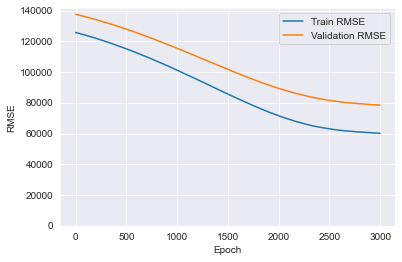

In [126]:
# Plot train_mse and val_mse
train_rmse = np.sqrt(training_history.history['loss'])
val_rmse = np.sqrt(training_history.history['val_loss'])
plt.plot(train_rmse, label='Train RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.legend('Train and validation RMSE during each epoch')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.ylim([0, None]) #Make y_axis start on 0 
plt.legend()

**Analyzing result**
- Model does stoped before reaching 3k epochs so it may be worth to increase number of epochs
- We can see that loss decreasing is slower around 3k -> It suggests that we are close to limit of potential of this network
- It stabilizing around 80k (validation error) and 60k (train error) which is higher than SGD
- We should try with more complex network

### More complex network

Lest double units of hidden layer

In [136]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu', input_shape=(number_of_features,)),
    tf.keras.layers.Dense(1, activation='linear')
])
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 24)                3648      
                                                                 
 dense_8 (Dense)             (None, 1)                 25        
                                                                 
Total params: 3,673
Trainable params: 3,673
Non-trainable params: 0
_________________________________________________________________


In [137]:
training_history = model.fit(
    X_train,
    y_train,
    epochs=4000, #I have increased to check if model would stop fitting
    callbacks=[early_stopping_callback],
    validation_data=(X_val, y_val),
    # verbose = 1 
    )

test_loss = model.evaluate(X_test, y_test)

Epoch 1/4000
13/13 [==============================] - 0s 9ms/step - loss: 17769949184.0000 - val_loss: 20872093696.0000
Epoch 2/4000
13/13 [==============================] - 0s 3ms/step - loss: 17769848832.0000 - val_loss: 20871991296.0000
Epoch 3/4000
13/13 [==============================] - 0s 3ms/step - loss: 17769742336.0000 - val_loss: 20871878656.0000
Epoch 4/4000
13/13 [==============================] - 0s 3ms/step - loss: 17769625600.0000 - val_loss: 20871757824.0000
Epoch 5/4000
13/13 [==============================] - 0s 3ms/step - loss: 17769496576.0000 - val_loss: 20871620608.0000
Epoch 6/4000
13/13 [==============================] - 0s 3ms/step - loss: 17769349120.0000 - val_loss: 20871462912.0000
Epoch 7/4000
13/13 [==============================] - 0s 3ms/step - loss: 17769183232.0000 - val_loss: 20871282688.0000
Epoch 8/4000
13/13 [==============================] - 0s 3ms/step - loss: 17768994816.0000 - val_loss: 20871081984.0000
Epoch 9/4000
13/13 [====================

In [138]:
print(training_history.history['loss'][-5:])
print(training_history.history['val_loss'][-5:])
print(test_loss)

[3049803776.0, 3049452544.0, 3049076480.0, 3048761088.0, 3048385536.0]
[5437684224.0, 5437075968.0, 5436535296.0, 5435866112.0, 5435345920.0]
2071932416.0


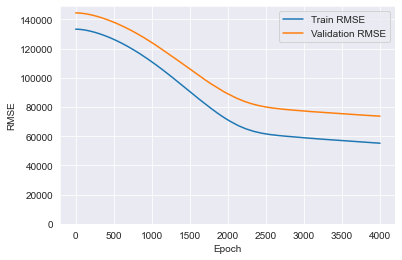

In [139]:
# Plot train_mse and val_mse
train_rmse = np.sqrt(training_history.history['loss'])
val_rmse = np.sqrt(training_history.history['val_loss'])
plt.plot(train_rmse, label='Train RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.legend('Train and validation RMSE during each epoch')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.ylim([0, None]) #Make y_axis start on 0 
plt.legend()

**Analyzing result**
- This time we have at 3k epochs val error = ~78k and train = ~60k (a little better then previously)
- Line is decrasing after 3k epochs faster than previously (we have more parameters so models has more to learn)
- That suggests that we are going in good direction - it may be worth to try bigger step and modify number of even more than doubling it!
- It may be worth to increase number of epochs twice.
- It is still worse result than with SGD regressor

### Another architecture of network

This time i've changed number of units 4 times (instead of 2)

In [145]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(96, activation='relu', input_shape=(number_of_features,)),
    tf.keras.layers.Dense(1, activation='linear')
])
model.compile(loss='mean_squared_error', optimizer='adam')

In [146]:
training_history = model.fit(
    X_train,
    y_train,
    epochs=10000, #I have increased to check if model would stop fitting
    callbacks=[early_stopping_callback],
    validation_data=(X_val, y_val),
    # verbose = 1 
    )

test_loss = model.evaluate(X_test, y_test)

Epoch 1/10000
13/13 [==============================] - 0s 10ms/step - loss: 17769771008.0000 - val_loss: 20871845888.0000
Epoch 2/10000
13/13 [==============================] - 0s 3ms/step - loss: 17769549824.0000 - val_loss: 20871593984.0000
Epoch 3/10000
13/13 [==============================] - 0s 3ms/step - loss: 17769261056.0000 - val_loss: 20871268352.0000
Epoch 4/10000
13/13 [==============================] - 0s 3ms/step - loss: 17768892416.0000 - val_loss: 20870850560.0000
Epoch 5/10000
13/13 [==============================] - 0s 3ms/step - loss: 17768427520.0000 - val_loss: 20870340608.0000
Epoch 6/10000
13/13 [==============================] - 0s 3ms/step - loss: 17767872512.0000 - val_loss: 20869726208.0000
Epoch 7/10000
13/13 [==============================] - 0s 3ms/step - loss: 17767213056.0000 - val_loss: 20869027840.0000
Epoch 8/10000
13/13 [==============================] - 0s 3ms/step - loss: 17766465536.0000 - val_loss: 20868222976.0000
Epoch 9/10000
13/13 [==========

In [150]:
print("3k epochs train/val rmse: ", train_rmse[3000], val_rmse[3000])
print(f"MAX epochs on {len(train_rmse)} train/val rmse: ", train_rmse[-1], val_rmse[-1])
print("Test RMSE:", np.sqrt(test_loss))

3k epochs train/val rmse:  49040.441107314684 67603.08063986433
MAX epochs on 4379 train/val rmse:  45936.39707247402 64072.7106965204
Test RMSE: 37067.4351958697


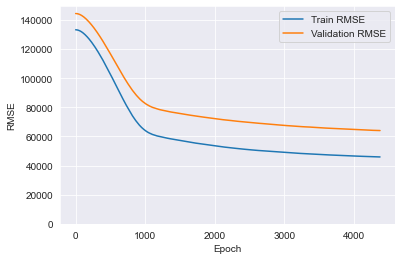

In [148]:
# Plot train_mse and val_mse
train_rmse = np.sqrt(training_history.history['loss'])
val_rmse = np.sqrt(training_history.history['val_loss'])
plt.plot(train_rmse, label='Train RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.legend('Train and validation RMSE during each epoch')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.ylim([0, None]) #Make y_axis start on 0 
plt.legend()

**Analyzing result**
- This time we have at 3k epochs val error = ~67 and train = ~49k (a little better then previously)
- At end of training we have RMSE: Train = 45k, VAL = 64, TEST = 37k
- This is comparable to SGDRegression
- We are still getting progress while increasing complexity of model, it may be worth to keep improving its architecture

BEST RESULTS FROM SGD REGRESSOR TO COMPARE:
TRAIN RMSE: 50128.4656; VAL RMSE: 63672.0239; TEST RMSE: 37274.0503

# Save to html
As hiperlinks dont work on github .ipynb files, this section will generate clone of notebook in html to make it possible to preview

In [88]:
# MAKE SURE YOU SAVED YOUR FILE RIGHT BEFORE RUNNING THIS CELL
# -> Otherwise it would not display current output of other cells
import os
notebook_name = os.path.basename(globals()['__vsc_ipynb_file__']) #This variant works with notebooks inside VSC
!jupyter nbconvert --to html $notebook_name

[NbConvertApp] Converting notebook ds_salaries.ipynb to html
[NbConvertApp] Writing 2171691 bytes to ds_salaries.html
